# Comparing NESC Simulation Data

https://nescacademy.nasa.gov/flightsim/

## Similarity Measures Check

Similarity measures found here: https://pypi.org/project/similaritymeasures/

In [3]:
#!pip3 -V
!pip3 install similaritymeasures

     |████████████████████████████████| 395 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 32.8 MB 27.0 MB/s eta 0:00:01
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14546 sha256=56d1629dbd7f86e3ae422ce654ae848fc29f7997384110913a1a3a02d19dd817
  Stored in directory: /Users/treyarthur/Library/Caches/pip/wheels/9e/62/78/e74575b333c72732ca81aa7fc0d4d994439015459224ce19d3
Successfully built similaritymeasures
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


30 30.0
-179 -179.0


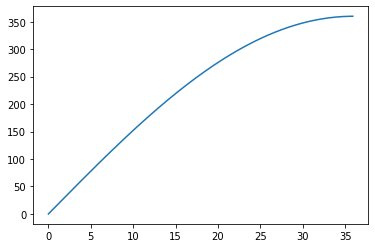

In [12]:
import math
import matplotlib.pyplot as plt

def Angle180(angle):
    twoPi = 360.0
    angle = angle / twoPi
    a2Pi = (angle - math.floor(angle)) * twoPi
    if a2Pi > 180.0:
        a2Pi -= twoPi
    return a2Pi
    
print( "30", Angle180(30) )
print( "-179", Angle180(181) )

x = []
y = []
y1 = []
for i in range(360):
    x.append(0.1*i)
    a = Angle180(i)
    b = 360*math.sin( math.radians(0.25*i))
    y.append( a )
    y1.append( b )

plt.figure()
plt.plot(x,y1)
#plt.plot(x,y,x,y1)

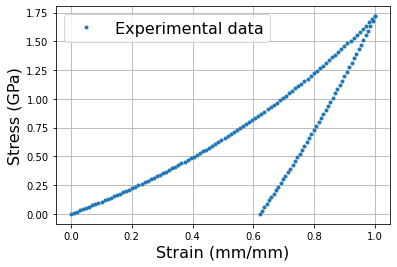

CPU times: user 215 ms, sys: 11.8 ms, total: 227 ms
Wall time: 238 ms


In [5]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures
from scipy.optimize import differential_evolution

x1 = np.linspace(0,1.0,num=100)
xEnd = np.log((1.0 + (2.0*np.exp(1.0)) - np.exp(1.0))/2.0)
x2 = np.linspace(1.0,xEnd, num=50)

y1 = np.exp(x1) - 1.0
y2 = 2*np.exp(x2) - 2.0*np.exp(1.0) + np.exp(1.0) - 1.0
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

exp_data = np.zeros((len(x), 2))
exp_data[:, 0] = x
exp_data[:, 1] = y


plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

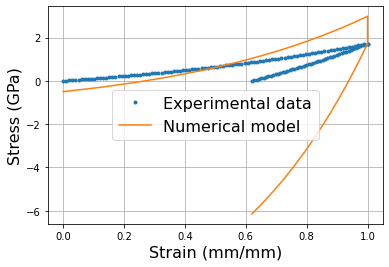

CPU times: user 250 ms, sys: 12.4 ms, total: 263 ms
Wall time: 303 ms


In [7]:
%%time
def getXY(betas):
    x1 = np.linspace(0,1.0,num=100)
    xEnd = np.log((1.0 + (2.0*np.exp(1.0)) - np.exp(1.0))/2.0)
    x2 = np.linspace(1.0,xEnd, num=50)

    y1 = np.exp(betas[0]*x1) + betas[1]
    y2 = 2.0*np.exp(betas[2]*x2) -2.0*np.exp(betas[3]) + np.exp(1.0) -1.0
    x = np.concatenate((x1,x2))
    y = np.concatenate((y1,y2))
    return x, y

beta = [1.5, -1.5, 2.0, 2.0]
x, y = getXY(beta)

# plot the results
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

df: 0.9000000000000004


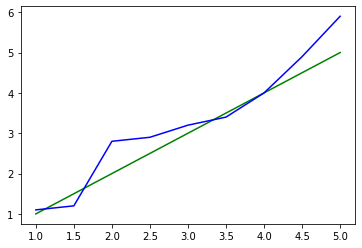

CPU times: user 209 ms, sys: 14.5 ms, total: 224 ms
Wall time: 256 ms


In [18]:
%%time
# Generate random experimental data
#x1 = np.random.random(100)
#y1 = np.random.random(100)
exp_data = np.zeros((5, 2))
#exp_data[:, 0] = x1
#exp_data[:, 1] = y1

exp_data[:, 0] = [1, 2, 3, 4, 5]
exp_data[:, 1] = [1, 2, 3, 4, 5]

# Generate random numerical data
#x2 = np.random.random(100)
#y2 = np.random.random(100)
num_data = np.zeros((9, 2))
num_data[:, 0] = [  1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
num_data[:, 1] = [1.1, 1.2, 2.8, 2.9, 3.2, 3.4, 4.0, 4.9, 5.9]

# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

print("df:",df)

# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1],'g')
plt.plot(num_data[:, 0], num_data[:, 1],'b')
plt.show()

## Read NESC Check Cases

Function to read in check cases from NESC.  The function gets columns of data from the check case CSV files.

In [1]:
import csv

def GetCheckCaseData(fileName):
    # open the CSV file as read-only
    csvFile = open(fileName,'r')
    # strip the newline character from the header line
    headerLine = csvFile.readline().rstrip("\n")
    # make a list of headers
    header = headerLine.split(',')
    print("number of headers: ", len(header))
    print(header)
    
    # create a data dictionary with header names as keys
    Data = {}
    for h in header:
        Data[h] = []
        
    # read each row in the datafile and add the data to the data dictionary
    for row in csv.reader(csvFile):
        for (i,d) in zip(header, row):
            Data[i].append( float(d) )
            
    return Data

Data checks:  
L-2: $ D(x,y) = [\Sigma (x_i - y_i)^2]^{1/2} $  
L-Infinity-Norm: $ max_i | x_i - y_i | $  

Manhattan distance: $ \Sigma_i | x_i - y_i | $

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def NescCheckData(data, checkData):
    l2Sum = 0
    manSum = 0
    infNorm = 0
    for (x, y) in zip(data, checkData):
        l2Sum += (x - y)**2
        dist = abs(x - y)
        manSum += dist
        if dist > infNorm:
            infNorm = dist
    return math.sqrt(l2Sum), infNorm 

def PrintErrorTable(labels, simData, checkData):
    print ("{:<25} {:<25} {:<25}".format('Variable', 'L2', 'L-Infinity-Norm'))
    print ("{:<25} {:<25} {:<25}".format('--------', '--', '---------------'))
    for i in labels:
        tmpDist = NescCheckData(checkData[i], simData.EnglishData[i])
        print ("{:<25} {:<25} {:<25}".format(i, tmpDist[0], tmpDist[1]))
        
def CompareSimTable(tableTitle, cc1File, cc2File):
    simData1 = GetCheckCaseData(cc1File)
    simData2 = GetCheckCaseData(cc2File)
    
    print("-----------------------------")
    print(tableTitle)
    print("-----------------------------")
    print ("{:<25} {:<25} {:<25}".format('Variable', 'L2', 'L-Infinity-Norm'))
    print ("{:<25} {:<25} {:<25}".format('--------', '--', '---------------'))
    
    labels = \
    [
        'time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 
        'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 
        'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 
        'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 
        'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 
        'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 
        'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 
        'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 
        'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 
        'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h'
    ]

    barL2 = {}
    barLinf ={}
    for i in labels:
        if (i in simData1) and (i in simData2):
            tmpDist = NescCheckData(simData1[i], simData2[i])
            print ("{:<25} {:<25} {:<25}".format(i, tmpDist[0], tmpDist[1]))
            barL2[i] = tmpDist[0]
            barLinf[i] = tmpDist[1]
            
    plt.rcdefaults()
    
    fig, ax = plt.subplots()
    y_pos = np.arange(len(barL2.keys()))
    #plt.xlim([0, 10])
    ax.barh(y_pos, barL2.values(), align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(barL2.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('L-2 Norm')
    ax.set_title(tableTitle)
    
    fig, ax = plt.subplots()
    y_pos = np.arange(len(barLinf.keys()))
    #plt.xlim([0, 10])
    ax.barh(y_pos, barLinf.values(), align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(barLinf.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('L-Infinity Norm')
    ax.set_title(tableTitle)

    plt.show()
    
    return
    
data1 = [  1,   2, 3,   4, 5]
data2 = [1.2, 2.2, 3, 3.9, 5]

dists = NescCheckData(data1, data2)
print("L-2 Norm, L-Infinity-Norm: ", dists)

L-2 Norm, L-Infinity-Norm:  (0.3000000000000001, 0.20000000000000018)


## Case 1 - Dropped Sphere

### Sim1 -> Sim2

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
number of headers:  27
['time', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_

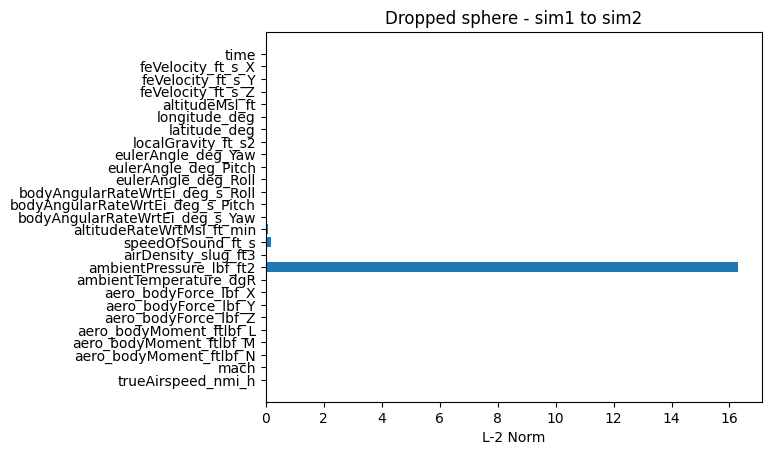

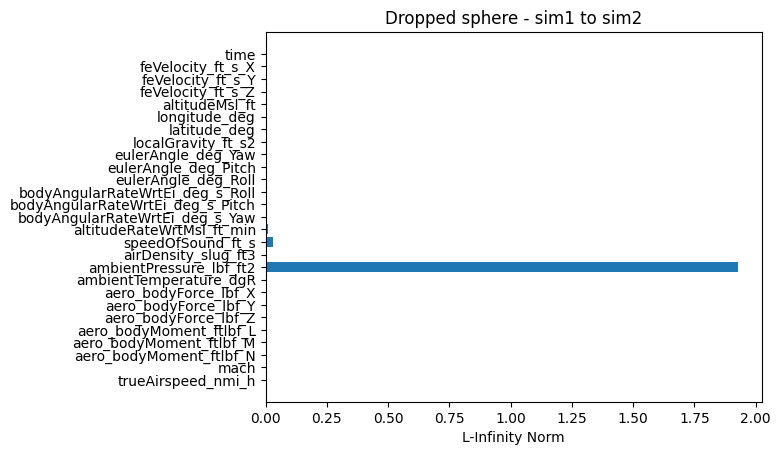

In [3]:
cc1File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_01.csv"
cc2File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_02.csv"
CompareSimTable("Dropped sphere - sim1 to sim2", cc1File, cc2File)

### Sim1 -> Sim3

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
number of headers:  22
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'altitudeRateWrtMsl_ft_min', 'speedOfSou

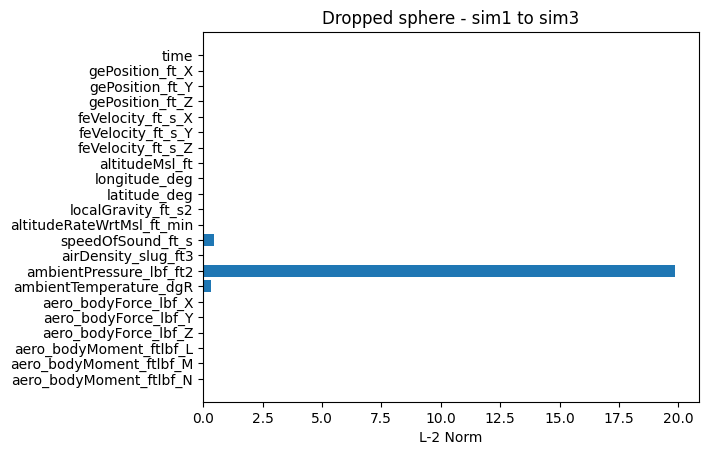

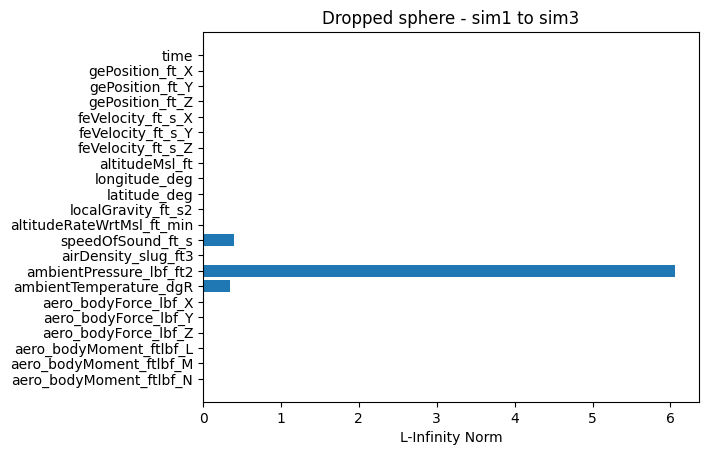

In [4]:
cc1File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_01.csv"
cc2File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_03.csv"
barL2 = CompareSimTable("Dropped sphere - sim1 to sim3", cc1File, cc2File)

### Sim1 -> Sim4

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
number of headers:  32
['time', 'eiPosition_ft_X', 'eiPosition_ft_Y', 'eiPosition_ft_Z', 'eiVelocity_ft_s_X', 'eiVelocity_ft_s_Y', 'eiVelocity_ft_s_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg',

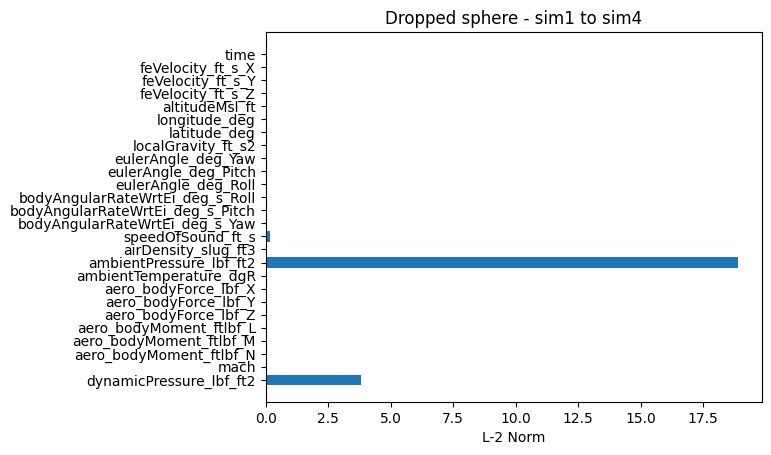

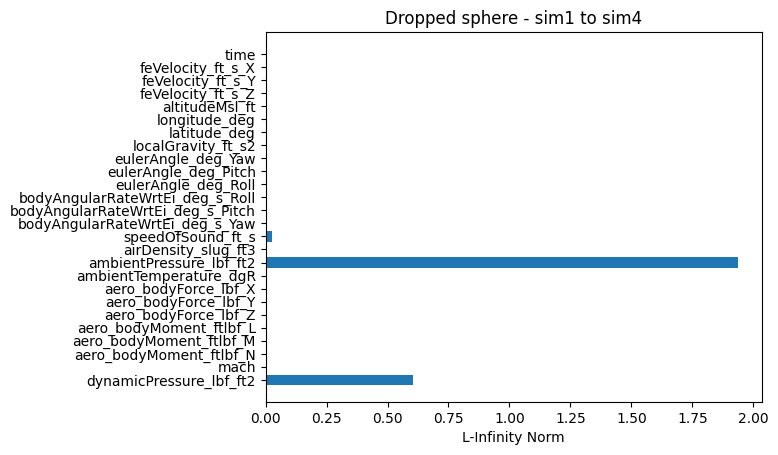

In [5]:
cc1File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_01.csv"
cc2File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_04.csv"
CompareSimTable("Dropped sphere - sim1 to sim4", cc1File, cc2File)

### Sim1 -> Sim5

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
number of headers:  38
['time', 'eiPosition_ft_X', 'eiPosition_ft_Y', 'eiPosition_ft_Z', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'eiVelocity_ft_s_X', 'eiVelocity_ft_s_Y', 'eiVelocity_ft_s_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft

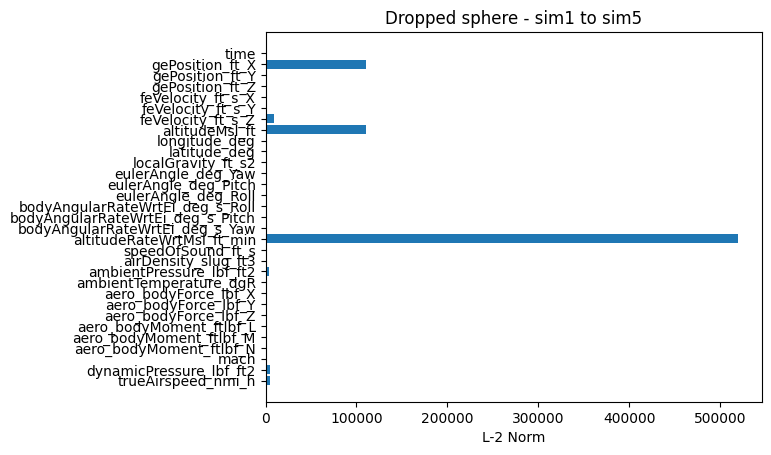

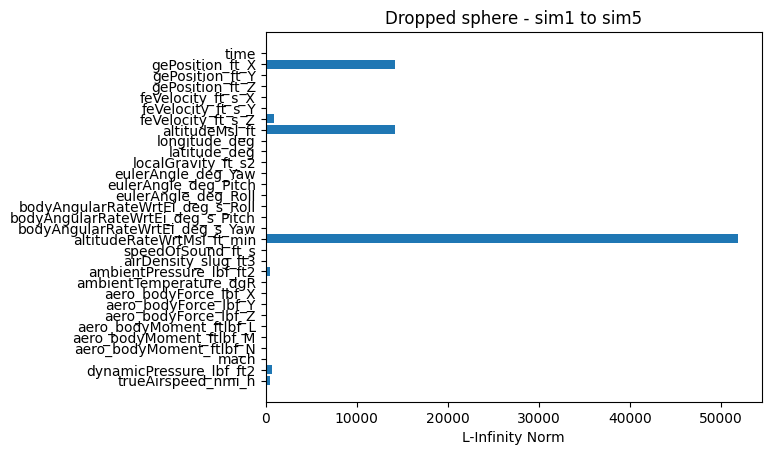

In [6]:
cc1File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_01.csv"
cc2File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_05.csv"
CompareSimTable("Dropped sphere - sim1 to sim5", cc1File, cc2File)

### Sim1 -> Sim6

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
number of headers:  37
['time', 'eiPosition_ft_X', 'eiPosition_ft_Y', 'eiPosition_ft_Z', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'eiVelocity_ft_s_X', 'eiVelocity_ft_s_Y', 'eiVelocity_ft_s_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft

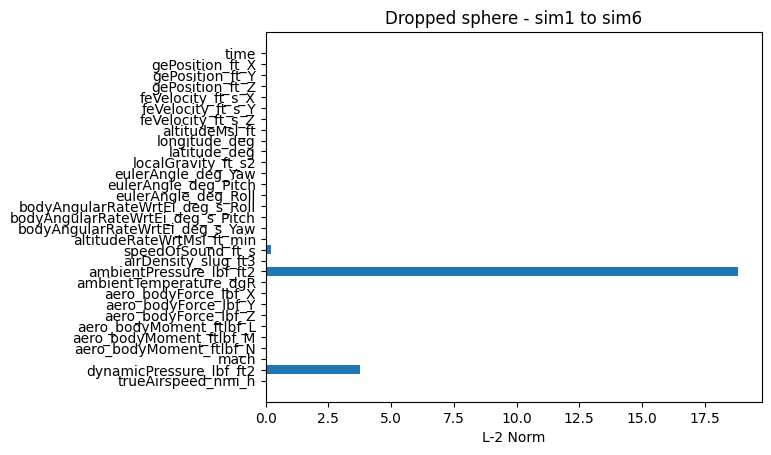

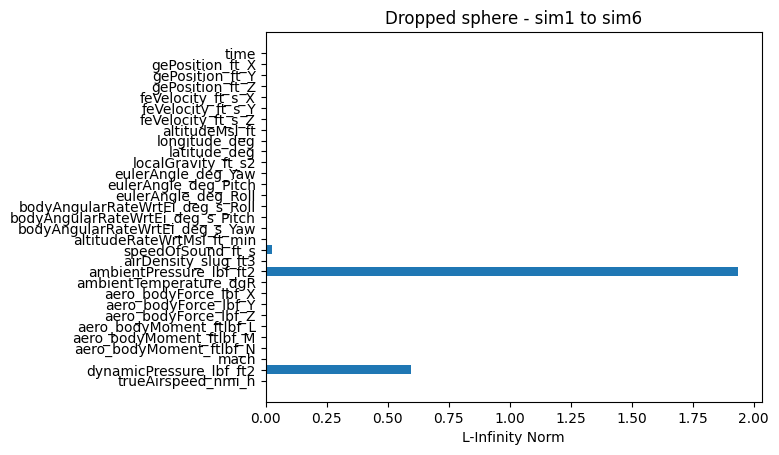

In [7]:
cc1File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_01.csv"
cc2File = "../NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/Atmos_01_sim_06.csv"
CompareSimTable("Dropped sphere - sim1 to sim6", cc1File, cc2File)